In [1]:
import pandas as pd

df = pd.read_csv("C:/Users/swobo/processed_titanic.csv")

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
feature_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
X_reg = df[feature_cols]
y_reg = df['Age']             

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

reg_tree = DecisionTreeRegressor(
    max_depth = 4,
)
reg_tree.fit(X_train_r, y_train_r)

y_pred_r = reg_tree.predict(X_test_r)

print("\n=== REGRESSION ===")
print("MSE =", mean_squared_error(y_test_r, y_pred_r))



=== REGRESSION ===
MSE = 0.0002503881780783453



=== CLASSIFICATION ===
ROC-AUC = 0.8181189581095596


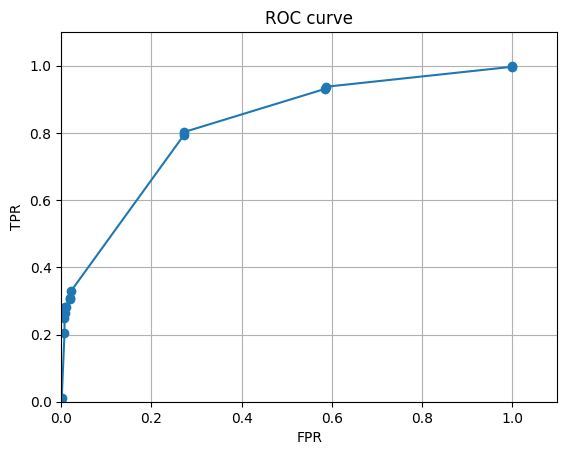

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_clf = df['HomePlanet_Europa'].astype(int)
X_clf = df[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_clf, y_clf, test_size=0.3, random_state=42
)

clf_tree = DecisionTreeClassifier(
    max_depth = 4,                   # CART по умолчанию → Gini impurity
)
clf_tree.fit(X_train_c, y_train_c)

y_proba = clf_tree.predict_proba(X_test_c)[:,1]   # вероятность для класса 1

# ROC
fpr, tpr, thresholds = roc_curve(y_test_c, y_proba)
roc_auc = auc(fpr, tpr)

print("\n=== CLASSIFICATION ===")
print("ROC-AUC =", roc_auc)

plt.plot(fpr, tpr, marker='o')
plt.ylim([0,1.1])
plt.xlim([0,1.1])
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.title("ROC curve")
plt.grid()
plt.show()